In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [3]:
font = r'pima.csv'

dataset = pd.DataFrame()

dataset = pd.read_csv(font, sep='\t')

In [4]:
dataset = dataset.rename(columns={"plasma glucose": "Glucose", "Diastolic blood pressure": "BloodPressure", "Triceps skin fold thickness" : "SkinThickness", "2-Hour serum insulin" : "Insulin", "Body mass index" : "BMI", "Diabetes pedigree function" : "DiabetesPedigree", "target" : "Outcome"})

In [5]:
with_diabetes = dataset.loc[dataset['Outcome'] == 1]
no_diabetes   = dataset.loc[dataset['Outcome'] == 0]

with_diabetes = with_diabetes.replace({'SkinThickness':0}, np.median(with_diabetes['SkinThickness']))
no_diabetes = no_diabetes.replace({'SkinThickness':0}, np.median(no_diabetes['SkinThickness']))
with_diabetes = with_diabetes.replace({'Insulin':0}, np.median(with_diabetes['Insulin']))
no_diabetes = no_diabetes.replace({'Insulin':0}, np.median(no_diabetes['Insulin']))
with_diabetes = with_diabetes.replace({'Glucose':0}, np.median(with_diabetes['Glucose']))
no_diabetes = no_diabetes.replace({'Glucose':0}, np.median(no_diabetes['Glucose']))
with_diabetes = with_diabetes.replace({'BMI':0}, np.median(with_diabetes['BMI']))
no_diabetes = no_diabetes.replace({'BMI':0}, np.median(no_diabetes['BMI']))
with_diabetes = with_diabetes.replace({'BloodPressure':0}, np.median(with_diabetes['BloodPressure']))
no_diabetes = no_diabetes.replace({'BloodPressure':0}, np.median(no_diabetes['BloodPressure']))

dataset = pd.concat([with_diabetes, no_diabetes])

In [6]:
y = dataset.Outcome
x = dataset.drop('Outcome', axis=1)
columns = x.columns

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(x)

data_x = pd.DataFrame(x, columns = columns)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.15, random_state = 45)

In [69]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([430, 430])

Accuracy of Neural Network on test set: 0.84


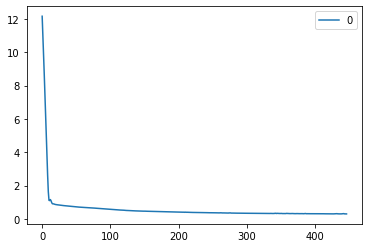

In [76]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter = 2000, hidden_layer_sizes=(9,5), learning_rate_init=.001)
model.fit(x_train, y_train)
pd.DataFrame(model.loss_curve_).plot()
y_pred = model.predict(x_test)
print('Accuracy of Neural Network on test set: {:.2f}'.format(model.score(x_test, y_test)))

In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.8326118326118326
0.8297394429469902
0.8419254658385094


In [10]:
#file = ProfileReport(dataset)
#file.to_file(output_file='output.html')